<h2>Welcome to this notebook</h2>

<h3>Data preprocessing</h3>

In [151]:
#Import libraries
import pandas as pd
import datetime as dt
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy.stats import skew, kurtosis, shapiro

In [118]:
#Load dataset
path = 'spain_energy_market.csv'
data = pd.read_csv(path, sep = ',', parse_dates= ['datetime'])

In [119]:
# Explore dataset size and shape
print(data.shape)
print(data.ndim)
print(data.size)
print(data.info())

(40212, 6)
2
241272
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  40212 non-null  datetime64[ns]
 1   id        40212 non-null  int64         
 2   name      34734 non-null  object        
 3   geoid     10956 non-null  float64       
 4   geoname   10956 non-null  object        
 5   value     40212 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.5+ MB
None


In [120]:
#Extract date,time, etc. from datetime column: 
data['date'] = data['datetime'].dt.date
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['time'] = data['datetime'].dt.time
data['hour'] = data['datetime'].dt.hour



In [121]:
#View the first x rows of data (here: 10)
data.head(10)

,datetime,id,name,geoid,geoname,value,date,month,day,time,hour
0,2014-01-01 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,25.280833,2014-01-01,1,1,23:00:00,23
1,2014-01-02 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,39.924167,2014-01-02,1,2,23:00:00,23
2,2014-01-03 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.992083,2014-01-03,1,3,23:00:00,23
3,2014-01-04 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.091667,2014-01-04,1,4,23:00:00,23
4,2014-01-05 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,13.587500,2014-01-05,1,5,23:00:00,23
5,2014-01-06 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,47.885417,2014-01-06,1,6,23:00:00,23
6,2014-01-07 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,41.207500,2014-01-07,1,7,23:00:00,23
7,2014-01-08 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,49.022083,2014-01-08,1,8,23:00:00,23
8,2014-01-09 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,56.202917,2014-01-09,1,9,23:00:00,23
9,2014-01-10 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,50.277083,2014-01-10,1,10,23:00:00,23


In [122]:
# Modify values within columns 
Sp = [
'Demanda programada PBF total',
'Demanda real',
'Energía asignada en Mercado SPOT Diario España',
'Energía asignada en Mercado SPOT Diario Francia',
'Generación programada PBF Carbón',
'Generación programada PBF Ciclo combinado',
'Generación programada PBF Eólica',
'Generación programada PBF Gas Natural Cogeneración',
'Generación programada PBF Nuclear',
'Generación programada PBF Solar fotovoltaica',
'Generación programada PBF Turbinación bombeo',
'Generación programada PBF UGH + no UGH',
'Generación programada PBF total',
'Precio mercado SPOT Diario ESP',
'Precio mercado SPOT Diario FRA',
'Precio mercado SPOT Diario POR',
'Rentas de congestión mecanismos implícitos diario Francia exportación',
'Rentas de congestión mecanismos implícitos diario Francia importación',
'Rentas de congestión mecanismos implícitos diario Portugal exportación',
'Rentas de congestión mecanismos implícitos diario Portugal importación'
]


En = [
'Scheduled Total Demand',
'Actual demanded power',
'Energy traded in daily spot Spanish market (OMIE)',
'Energy traded in daily spot French market',
'Scheduled Coal electricity generation',
'Scheduled Combined Cycle electricity generation',
'Scheduled Wind electricity generation',
'Scheduled Natural Gas electricity Co-generation',
'Scheduled Nuclear electricity generation',
'Scheduled Photovoltaic electricity generation',
'Scheduled Reversible-Hydro electricity generation',
'Scheduled Total Hydro electricity generation',
'Scheduled Total electricity generation',
'Daily spot Spain market price',
'Daily spot France market price',
'Daily spot Portugal market price',
'Daily spot export from France price',
'Daily spot import to France price',
'Daily spot export from Portugal price',
'Daily spot import to Portugal price'
]
data = data.replace(to_replace = Sp, value= En)

In [123]:
#Filter rows based on the values in a given column
data= data[data.name =='Actual demanded power']

# Alternatively:
# data = data[data['name'] =='Actual demanded power']

In [124]:
# Create an index column (type datetimeindex)
data.set_index(data['date'], inplace = True)
# Equivalent to data = data.set_index(data['date'])

In [125]:
#Filter column by name 
data = data[['value']]

#Can also filter rows and columns by name or index using loc and iloc respectively
#data.iloc[0:5,:]

In [126]:
#Summary statistics
data.describe()

,value
count,1825.000000
mean,28506.322147
std,2747.797280
min,21196.722222
25%,26860.493056
50%,28513.465278
75%,30650.000000
max,35306.409722


In [127]:
#Convert timeseries into a specific frequency (can add rows with missing values)
data = data.asfreq('D')

In [128]:
#Rename columns
data = data.rename(columns = {'value': 'energy'})

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   energy  1825 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


In [130]:
data[:5]

,energy
date,
2014-01-01,28191.597222
2014-01-02,28465.180556
2014-01-03,26860.493056
2014-01-04,25333.597222
2014-01-05,23905.541667


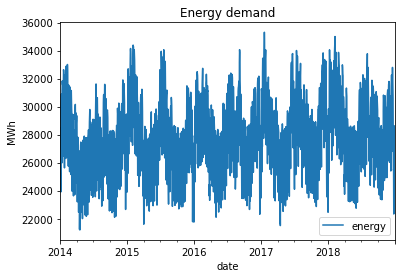

In [131]:
#Plot data
data.plot(title = 'Energy demand')
plt.ylabel("MWh")
plt.show()

#The plot method on Series and DataFrame is just a simple wrapper around plt.plot
#On DataFrame, plot is a convenience to plot all of the columns with labels:
#https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html

In [132]:
#Create date related features based on the datetime index
data['year'] = data.index.year
data['quarter'] = data.index.quarter
data['month'] = data.index.month
data['week'] = data.index.isocalendar().week
data['dayofweek'] = data.index.dayofweek
data['day'] = data.index.weekday

In [133]:
#Create a column for row number (will be used for moving averages/windoow function features)
data["ix"] = range(0,len(data))

In [134]:
#Create moving averages and standard deviations over a week, a month, a quarter, a year
data[['movave7','movstd7']]=data.energy.rolling(7).agg([np.mean, np.std])
data[['movave30', 'movstd30']]=data.energy.rolling(30).agg([np.mean, np.std])
data[['movave90','movstd90']]=data.energy.rolling(90).agg([np.mean, np.std])
data[['movave365', 'movstd365']]=data.energy.rolling(365).agg([np.mean, np.std])

In [135]:
#Delete one or several columns 
data = data.drop('dayofweek', axis = 1)

#Can delete rows by index as well idf selecting axis = 0

In [137]:
data.head(50)

,energy,year,quarter,month,week,day,ix,movave7,movstd7,movave30,movstd30,movave90,movstd90,movave365,movstd365
date,,,,,,,,,,,,,,,
2014-01-01,28191.597222,2014,1,1,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,28465.180556,2014,1,1,1,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,26860.493056,2014,1,1,1,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-04,25333.597222,2014,1,1,1,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-05,23905.541667,2014,1,1,1,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,29859.201389,2014,1,1,2,0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,30573.444444,2014,1,1,2,1,6,27598.436508,2393.614588,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-08,30887.750000,2014,1,1,2,2,7,27983.601190,2702.024721,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-09,30847.819444,2014,1,1,2,3,8,28323.978175,2914.517046,NaN,NaN,NaN,NaN,NaN,NaN


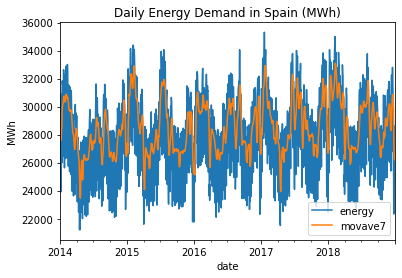

In [138]:
#Plot time series data + moving average over a week
data[['energy','movave7']].plot(title = 'Daily Energy Demand in Spain (MWh)')
plt.ylabel("MWh")
plt.show()

<h3>Exploratory data analysis</h3>

<h4>Target analysis: normality</h4>

In [153]:
#Study mean, sd, skewness and kurtosis of the target variable
mean = np.mean(data.energy)
sd = np.std(data.energy)
skewness = skew(data.energy)
excess_kurt = kurtosis(data.energy)

print('Mean: {} \nStandard Deviation: {} \nSkewness: {} \nKurtosis: {}'.format(mean, sd, skewness, excess_kurt+3))

Mean: 28506.322147084902 
Standard Deviation: 2747.044356163866 
Skewness: -0.23821477713202463 
Kurtosis: 2.5437455006741434


In [154]:
#adding .values returns a numpy representation of the dataframe
#Study mean, sd, skewness and kurtosis of the target variable
mean = np.mean(data.energy.values)
sd = np.std(data.energy.values)
skewness = skew(data.energy.values)
excess_kurt = kurtosis(data.energy)

print('Mean: {} \nStandard Deviation: {} \nSkewness: {} \nKurtosis: {}'.format(mean, sd, skewness, excess_kurt+3))

Mean: 28506.322147084902 
Standard Deviation: 2747.044356163866 
Skewness: -0.23821477713202463 
Kurtosis: 2.5437455006741434


- Skewness is smaller than 0 so the curve is not symetric, it is negatively skewed, meaning that there is a long tail to the left. 
- Kurtosis <3 the tails are slightly thicker and the peak is slightly flatter than a normal ditribution. There are less chances to find extreme values.

In [159]:
# test de Shapiro pour évaluer si les données sont issues d'une distribution normale 

def shapiro_test (data, alpha = 0.05): 
    print('H0: Data was drawn from a normal distribution')
    stat, p_val = shapiro(data)
    if p_val<alpha:
        print('The p-value {} is lower than significance level {} hence the null hypothesis is rejected and the sample was not drawn from a normal distribution'.format(p_val,alpha))
    else:
        print('p-value {} is higher than significance level {} hence the null hypothesis cannot be rejected'.format(p_val,alpha))
        
shapiro_test(data.energy, 0.05)

H0: Data was drawn from a normal distribution
The p-value 2.1244974529599503e-11 is lower than significance level 0.05 hence the null hypothesis is rejected and the sample was not drawn from a normal distribution
